In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('./train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


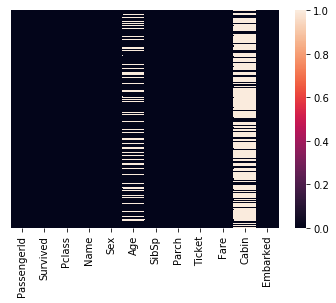

In [4]:
sns.heatmap(train.isnull(),yticklabels=False)

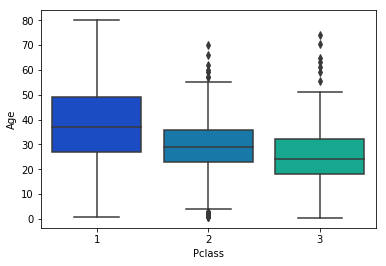

In [5]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


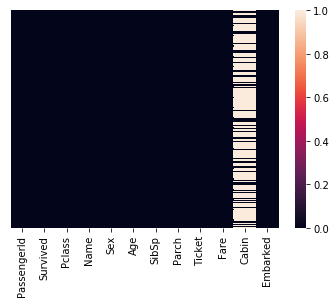

In [6]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else: return Age
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)
sns.heatmap(train.isnull(),yticklabels=False)

In [7]:
train.drop('Cabin',axis = 1, inplace = True)
# Converting Categorical Features
sex = pd.get_dummies(train['Sex'], drop_first = True)
embark = pd.get_dummies(train['Embarked'],drop_first = True)
train.drop(['Sex','Embarked','Name','Ticket'], axis =1, inplace = True)
train = pd.concat([train,sex, embark],axis = 1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [8]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(train.drop('Survived', axis = 1),train['Survived'])

/home/narutoadi/Envs/hiration/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

/home/narutoadi/Envs/hiration/lib/python3.5/site-packages/matplotlib/axes/_base.py:3179: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


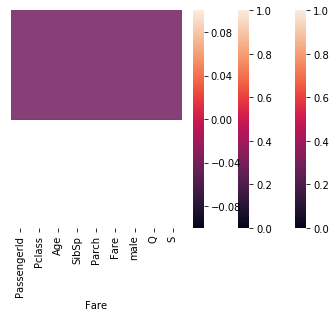

In [9]:
# predict
test = pd.read_csv('./test.csv')
sns.heatmap(test.isnull(),yticklabels=False)
test['Age'] = test[['Age', 'Pclass']].apply(impute_age, axis = 1)
test.drop('Cabin',axis = 1, inplace = True)
sns.heatmap(test.isnull(),yticklabels=False)
sex = pd.get_dummies(test['Sex'], drop_first = True)
embark = pd.get_dummies(test['Embarked'],drop_first = True)
test.drop(['Sex','Embarked','Name','Ticket'], axis =1, inplace = True)
test = pd.concat([test,sex, embark],axis = 1)
test.dropna(axis=0, how='all')
Fare_avg = test['Fare'].mean()
def impute_Fare(col):    
    if pd.isnull(col):        
            return Fare_avg
    else: return col
test['Fare'] = test['Fare'].apply(impute_Fare)
sns.heatmap(test.isnull(),yticklabels=False)
sns.distplot(test['Fare'])
Pred = LR.predict(test)
Survived=pd.DataFrame(data=Pred,columns=['Survived'])
pred_final=pd.concat([test['PassengerId'],Survived],axis =1)
pred_final.to_csv('Titanic_predict.csv',index=False)